In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.integrate import odeint
from scipy.optimize import least_squares
import math
import pandas as pd
import csv
import matplotlib.gridspec as gridspec
from scipy import stats
from scipy import optimize
from datetime import date, timedelta
import random
import requests
#import seaborn as sns
from scipy.stats import truncnorm
#pl.style.use("seaborn-darkgrid")

df_pops=pd.read_csv('Best_Fits.csv',sep=';')

state_dic={'AC': 'Acre',
 'AL': 'Alagoas',
 'AP': 'Amapá',
 'AM': 'Amazonas',
 'BA': 'Bahia',
 'CE': 'Ceará',
 'DF': 'Federal District',
 'ES': 'Espírito Santo',
 'GO': 'Goiás',
 'MA': 'Maranhão',
 'MT': 'Mato Grosso',
 'MS': 'Mato Grosso do Sul',
 'MG': 'Minas Gerais',
 'PA': 'Pará',
 'PB': 'Paraíba',
 'PR': 'Paraná',
 'PE': 'Pernambuco',
 'PI': 'Piauí',
 'RJ': 'Rio de Janeiro',
 'RN': 'Rio Grande do Norte',
 'RS': 'Rio Grande do Sul',
 'RO': 'Rondônia',
 'RR': 'Roraima',
 'SC': 'Santa Catarina',
 'SP': 'São Paulo',
 'SE': 'Sergipe',
 'TO': 'Tocantins'}


capital_dic={
    'AC': 'Rio Branco',
    'AL': 'Maceió',
    'AP': 'Macapá',
    'AM': 'Manaus',
    'BA': 'Salvador',
    'CE': 'Fortaleza',
    'DF': 'Brasília',
    'ES': 'Vitória',
    'GO': 'Goiânia',
    'MA': 'São Luís',
    'MT': 'Cuiabá',
    'MS': 'Campo Grande',
    'MG': 'Belo Horizonte',
    'PA': 'Belém',
    'PB': 'João Pessoa',
    'PR': 'Curitiba',
    'PE': 'Recife',
    'PI': 'Teresina',
    'RJ': 'Rio de Janeiro',
    'RN': 'Natal',
    'RS': 'Porto Alegre',
    'RO': 'Porto Velho',
    'RR': 'Boa Vista',
    'SC': 'Florianópolis',
    'SP': 'São Paulo',
    'SE': 'Aracaju',
    'TO': 'Palmas'
}


df3=pd.read_csv('../data/pop_muni.csv')
pop_dic={}

    
for state in df3['ARmaior'].unique():
    pop_state=[]

    Sigla=df3.loc[df3['ARmaior'] == state].NomeMunic.values[0][-2]+df3.loc[df3['ARmaior'] == state].NomeMunic.values[0][-1]
    
    pop_state.append(sum(df3.loc[df3['ARmaior'] == state].Total.values))
    
    Sigla=df3.loc[df3['ARmaior'] == state].NomeMunic.values[0][-2]+df3.loc[df3['ARmaior'] == state].NomeMunic.values[0][-1]
    
    ind1=list(df3.loc[(df3['ARmaior'] == state)& (df3['Sexo'] =='f' )].NomeMunic.values).index(capital_dic[Sigla]+" - "+Sigla)
    ind2=list(df3.loc[(df3['ARmaior'] == state)& (df3['Sexo'] =='m' )].NomeMunic.values).index(capital_dic[Sigla]+" - "+Sigla)

    
    
    pop_state.append(df3.loc[(df3['ARmaior'] == state)& (df3['Sexo'] =='f' )].Total.values[ind1]+df3.loc[(df3['ARmaior'] == state)& (df3['Sexo'] =='m' )].Total.values[ind2])
    
    
    pop_state.append(pop_state[0]-pop_state[1])
    
    pop_dic[Sigla]=pop_state



In [2]:
    #Defining the Steap Function 
kb=50
def H(t):
        h = 1.0/(1.0+ np.exp(-2.0*kb*t))
        return h


    #Defining the Beta(t)
def beta(t,t1,b,b1):
        beta = b*H(t1-t) + b1*H(t-t1) 
        return beta



#Defining the Model
def SEIIR(f,t,parametros):
    
        #parameters
        b, b1, delta, p, t1, kappa,gammaA,gammaS = parametros
    
        #variables
        S = f[0]
        E = f[1]
        IA = f[2]
        IS = f[3]
        R = f[4]
        Nw = f[5]
    
    
        #equations
        dS_dt = - beta(t,t1,b,b1)*S*(IS + delta*IA) 
        dE_dt = beta(t,t1,b,b1)*S*(IS + delta*IA) - kappa * E
        dIA_dt = (1-p)*kappa*E - gammaA*IA
        dIS_dt = p*kappa*E - gammaS*IS
        dR_dt = gammaA*IA  + gammaS*IS

    
    
        #epidemic curve
        dNw_dt = p*kappa*E
    
        #Returning the derivatives
        return [dS_dt,dE_dt,dIA_dt,dIS_dt,dR_dt,dNw_dt]


# Calculus of the effective reproduction number

In [3]:
#(Fjj - Fii)
def Prod(i,F):
    P=1
    for j in range(len(F)):
        if i!=j:
          
            P= P*(F[j]-F[i])
    
    return P

#g(x)
def g(x,F):

    g=0
    
    for i in range(len(F)):
        
        if 0!=Prod(i,F): 
            g += np.exp(-F[i]*x)/Prod(i,F)
        
    g=np.prod(F)*g
    
    return g
    

    
#Integral b(t-x)g(x) dx
def Int(b,t,F):

    Int=0
    for x in range(t+1):
        
        Int += b[t-x]*g(x,F)
        
    return Int

# R(t)
def Rt(b,par):
    
    #Defining the F matrix array
    F=np.array([par[4:7]])[0]
    
    #Data
    
    Rt=[]
    
    for t in range(len(b)):
        
        Rt.append(b[t]/Int(b,t,F))
        
    Rt=np.array(Rt)
    

    return Rt

## Choose the state

BA


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: over

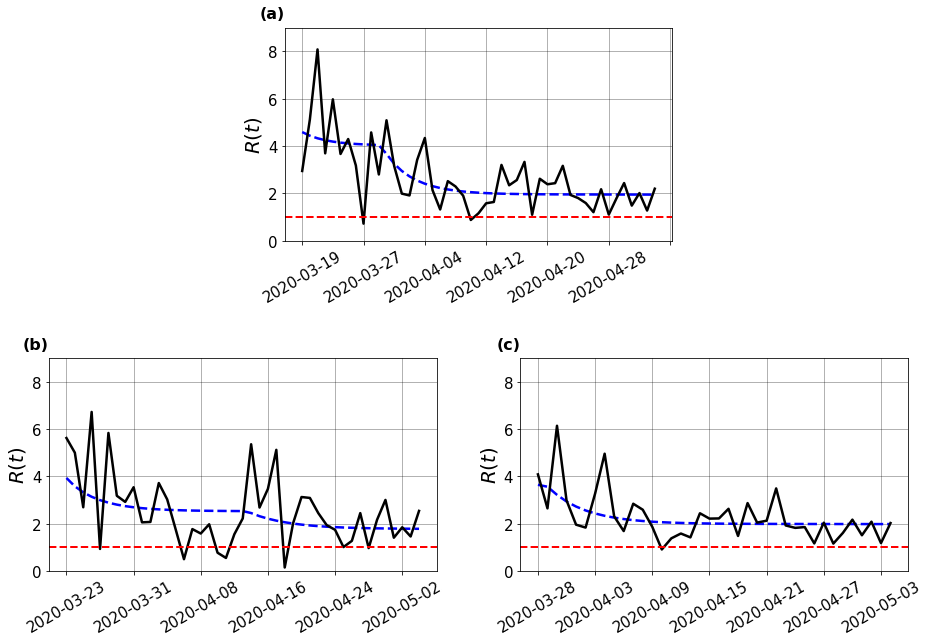

In [4]:
#for s in state_dic.keys():
for s in ['BA']:
    print(s)
    
    y_lim=[]
    
    if s!='DF':

        #Criar um grid para as figuras usando GridSpec
        gs = gridspec.GridSpec(nrows = 2, ncols = 4)

        #Definir o tamanho do plot que sera usado para cada plot individula tem o mesmo efieto de quando passado para subplot
        fig=pl.figure(figsize=(15.4,10))

        #Definir espaco em branco entre os plots
        gs.update(wspace = 0.55)
        gs.update(hspace = 0.55)

        ax=[]
        #Criar o layout onde os plots serao gerados. E nessa parte que se define o grid
        ax1 = pl.subplot(gs[0, 1:3]) #Ininicar um plot em branco no centro da primeira linha (0)
        ax2 = pl.subplot(gs[1, :2])  #Ininicar um plot em branco na primeira posicao da segunda linha
        ax3 = pl.subplot(gs[1, 2:])  #Ininicar um plot em branco no segunda posicao da seguna linha

        ax.append(ax1)
        ax.append(ax2)
        ax.append(ax3)
    
        k=0
    
    
        for Type_Fit in ['estado','capital','interior']:

        
            #Load the Data
            df = pd.read_csv ("../../../../SEIRHUD/data/BA/" + Type_Fit + ".csv")
        
            par=df_pops.loc[df_pops['Source']==s +'_'+Type_Fit].values[0][1:12]
            
            dates_t=df.date.values
        
            
        
            data_t=df.cases.values
            
            
            N=int(round(pop_dic[s][k]))
        
            tf=list(dates_t).index('2020-05-05')
        
            dates=dates_t[:tf]
            data=np.diff(data_t[:tf+1])
            
            
            ts0=np.array(list(range(len(dates_t[:tf+1]))))+1
        

        
            #Integrates
        
            #0 1    2     3  4      5       6       7
            b, b1, delta, p, kappa, gammaA, gammaS, ia0, is0, e0, t1 = par
            
            parode = b, b1, delta, p, t1, kappa,gammaA,gammaS


            q0 = [1-ia0 - is0 -e0,e0,ia0,is0,0,0]


            qs = odeint(SEIIR,q0, ts0,args=(parode,),mxstep=1000000)


    
            sim_data =N*np.diff(qs[:,-1])

        
        #R(t)
        
            Rt_data=Rt(data,par)
    
            Rt_sim=Rt(sim_data,par)

        
        

        
        #Plotting

            y_lim.append(max(Rt_data))
        
            
            if Type_Fit=='estado':
                w=13
            elif Type_Fit=='capital':
                w=10
            else:
                w=22
            
            ax[k].plot(dates[w:], Rt_sim[w:],color='blue',linestyle='--', linewidth=2.5,label=r'$R(t)$ From the Model Simulations')
            ax[k].plot(dates[w:], Rt_data[w:],'k-', linewidth=2.5,label=r'$R(t)$ From the Data')
        
        
            ax[k].grid(which='major', axis='both', color='black',linewidth=1.,alpha=0.3)
      
            ax[k].axhline(1, 0, 600,color='r',linestyle='--',linewidth=2.)


            #ax.set_xlabel('(a)',fontsize=20)
            ax[k].set_ylabel(r'$ R(t)$',fontsize=20, fontname="Arial")

         
            k+=1





        
        ax1.set_ylim(0., 9)
        ax2.set_ylim(0., 9)
        ax3.set_ylim(0., 9)

        
        ax2.tick_params(labelsize=15)
        ax3.tick_params(labelsize=15)
        ax1.tick_params(labelsize=15)

        ax1.text(0, 1.10,'(a)', transform=ax1.transAxes,
              fontsize=16, fontweight='bold', va='top', ha='right')

        ax2.text(0, 1.10,'(b)', transform=ax2.transAxes,
              fontsize=16, fontweight='bold', va='top', ha='right')

        ax3.text(0, 1.10,'(c)', transform=ax3.transAxes,
              fontsize=16, fontweight='bold', va='top', ha='right')




        ax1.xaxis.set_major_locator(pl.MaxNLocator(7))
        pl.setp(ax1.get_xticklabels(), rotation=30)

        ax2.xaxis.set_major_locator(pl.MaxNLocator(7))
        pl.setp(ax2.get_xticklabels(), rotation=30)

        ax3.xaxis.set_major_locator(pl.MaxNLocator(7))
        pl.setp(ax3.get_xticklabels(), rotation=30)




    
        for tick in ax1.get_xticklabels():
            tick.set_fontname("Arial")
        for tick in ax1.get_yticklabels():
            tick.set_fontname("Arial")  

        for tick in ax2.get_xticklabels():
            tick.set_fontname("Arial")
        for tick in ax2.get_yticklabels():
            tick.set_fontname("Arial")  
    
        for tick in ax3.get_xticklabels():
            tick.set_fontname("Arial")
        for tick in ax3.get_yticklabels():
            tick.set_fontname("Arial")  

        
        pl.show()
                 
        fig.savefig(r"Figs\\"+s+".png",bbox_inches='tight')